### 중고차 블로그 워드 클라우드

In [1]:
!pip install wordcloud

In [2]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/19.4 MB 7.0 MB/s eta 0:00:03
      --------------------------------------- 0.3/19.4 MB 3.2 MB/s eta 0:00:07
      --------------------------------------- 0.4/19.4 MB 3.8 MB/s eta 0:00:05
     - -------------------------------------- 0.6/19.4 MB 3.6 MB/s eta 0:00:06
     - -------------------------------------- 0.7/19.4 MB 3.8 MB/s eta 0:00:06
     - -------------------------------------- 0.8/19.4 MB 3.0 MB/s eta 0:00:07
     -- ------------------------------------- 1.0/19.4 MB 3.1 MB/s eta 0:00:06
     -- ------------------------------------- 1.2/19.4 MB 3.2 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 3.3 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 3.3 MB/s eta 0:00:06
     -- ------------------------------------- 1.3/19.4 MB 2.6 MB/s eta 0:00:08
     --- ------------------------------------ 1.5/19.4 MB 2

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from konlpy.tag import Okt,Komoran
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
blog_data = pd.read_csv('blog.csv',encoding='UTF8',index_col=0)
blog_data.head()

,idx,title,body
0,0,참정직해 BMW X3 중고차 얼씨9나,"처음 차를 구입하기로 마음먹었을 때는, 지인들과 의견 마찰이 있었어요 누구는 처음부..."
1,1,수월한 중고차 구입 2023년 고착,갑작스레 급히 자차가 필요했던 건그간 열심히 다닌 직장을 퇴사하고급 한적한 곳에서한...
2,2,부산중고차수출 만족했던 방법!,이번에 차량을 처리하는 방법을 알아보게 되었어요. 저에게는 부모님이 물려주신 차량이...
3,3,대기업 중고차 달랐던 점은,당시 제가 학생 신분으로 지냈을 때는차를 끌고 다닐 필요성에 대해 체감하지 못했는데...
4,4,부산중고차수출 잘해냈던 이유!,불경기가 이어지면서 저도 불필요한지출을 조금이라도 줄이는게 맞겠다싶더라구요 물가는 ...


In [3]:
data = blog_data['title'].values + blog_data['body'].values

In [4]:
data = list(data)

In [5]:
data = data[11:]

39
47
74
132
252
253
263
264
277
307
316
320
323
344
358
414
446


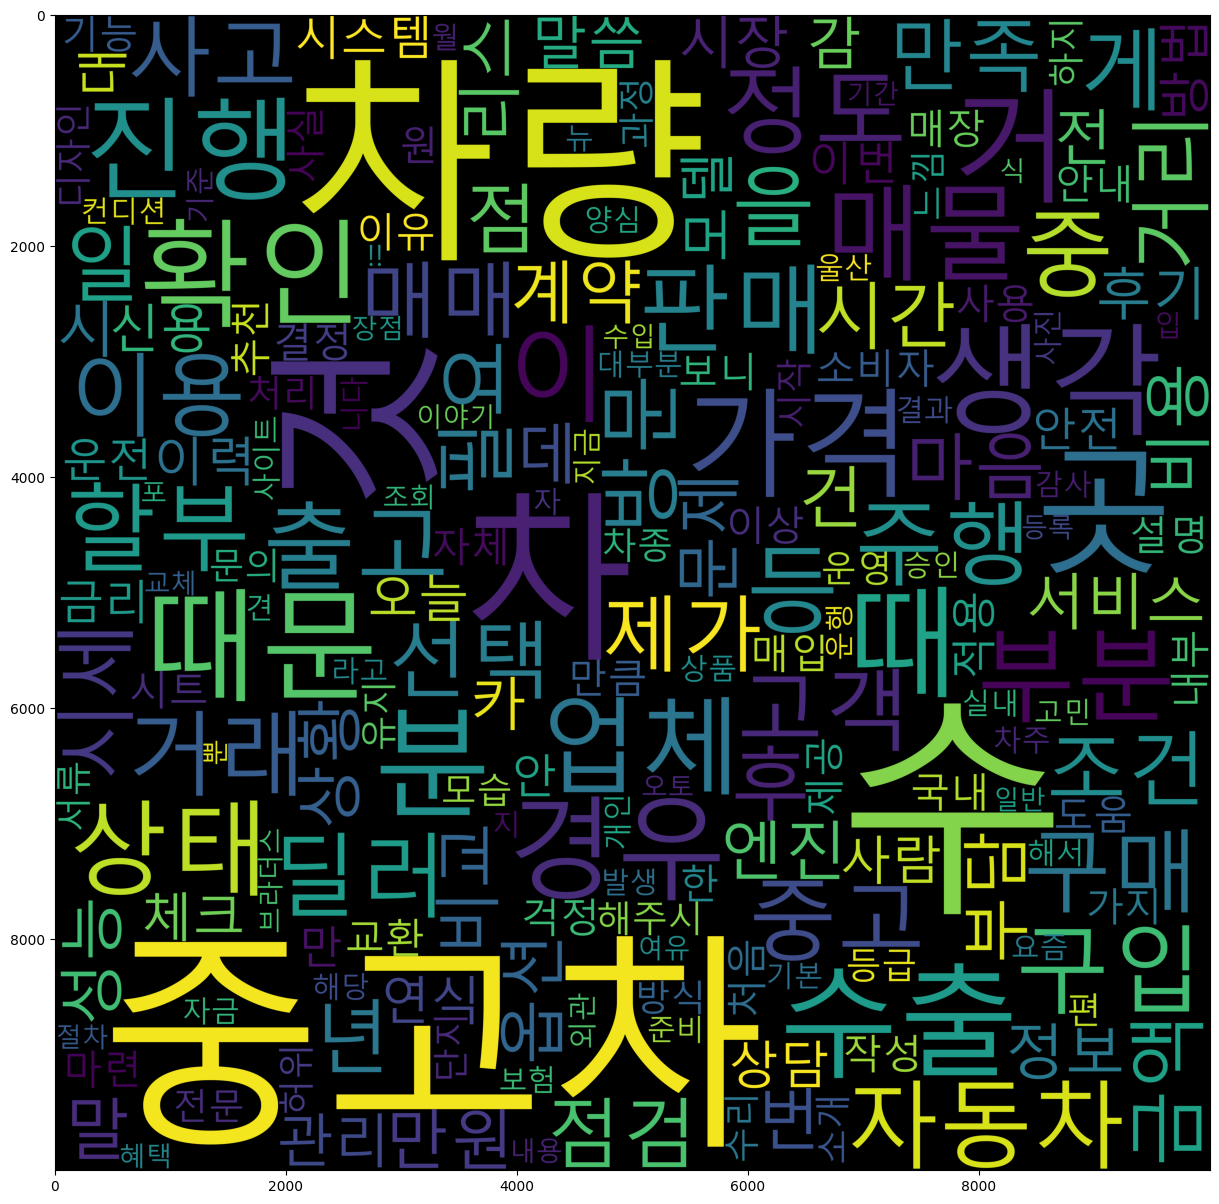

In [6]:
words = []

# 형태소 분석
komoran = Komoran()
for idx,title_body in enumerate(data):
    try:
        nouns = komoran.nouns(title_body)
        words.extend(nouns)
    except:
        print(idx)
        pass

In [27]:
# 워드 클라우드
def cloud(word):
    palettes = ['spring', 'summer', 'seismic','Pastel1','prism','summer']
    wCloud = Counter(word)

    wc = WordCloud(font_path='malgun', width=2000, height=2000, 
                   scale=5.0, max_font_size=400,
                   colormap = palettes[5])
    gen = wc.generate_from_frequencies(wCloud)
    plt.figure(figsize=(10,10))
    plt.imshow(gen)

    plt.savefig('word.png')


In [ ]:
cloud(words)

정렬을 해도, 검색하면 이상하게 검출됨 ... 왜징

In [23]:
count = Counter(words)
print('count : ', count)

# sorted_dict = OrderedDict(count.most_common())
# print(sorted_dict)
sorted_dict = sorted(count.items(), key = lambda item: item[1],reverse=True)
sorted_list = sorted(sorted_dict, key = lambda x:x[1], reverse = True)
print('sorted_list : ',sorted_list)

print(sorted_list[0][0], sorted_list[1][0], sorted_list[2][0], sorted_list[3][0], sorted_list[4][0])

for r in range(0,10):
    print(r, 'delete : ',sorted_list[r][0])
    #sorted_list.remove(sorted_list[r])
    del sorted_list[r]

print(sorted_list)

count :  Counter({'수': 4398, '중고차': 4116, '차량': 3707, '것': 2595, '차': 2479, '곳': 1370, '거': 1041, '수출': 1034, '때문': 1014, '분': 1009, '생각': 1003, '때': 990, '가격': 954, '확인': 933, '경우': 872, '진행': 854, '업체': 761, '이': 750, '매물': 731, '상태': 719, '부분': 701, '판매': 628, '구입': 619, '등': 611, '출고': 610, '정도': 610, '자동차': 608, '할부': 602, '중': 601, '거래': 566, '딜러': 564, '주행': 558, '이용': 551, '중고': 543, '구매': 541, '게': 524, '고객': 523, '사고': 499, '을': 484, '선택': 461, '일': 451, '방문': 446, '매매': 446, '거리': 445, '조건': 443, '제가': 441, '년': 432, '시세': 432, '후': 424, '필요': 423, '만족': 421, '금액': 419, '점검': 403, '점': 397, '시간': 396, '마음': 392, '계약': 389, '번': 388, '옵션': 388, '건': 387, '비용': 386, '부담': 384, '비교': 380, '말': 378, '상황': 370, '성능': 365, '데': 361, '만원': 361, '문제': 360, '엔진': 355, '리스': 352, '서비스': 351, '전': 350, '정보': 349, '시': 345, '관리': 333, '말씀': 330, '카': 325, '감': 320, '후기': 317, '시장': 316, '모델': 313, '이력': 311, '체크': 311, '신용': 309, '방법': 308, '연식': 305, '사람': 305, '대': 304, '상담': 302, '오늘

Counter({'수출': 1034, '가격': 954, '업체': 761, '상태': 719, '판매': 628, '구입': 619, '출고': 610, '할부': 602, '거래': 566, '딜러': 564, '주행': 558, '구매': 541, '사고': 499, '방문': 446, '매매': 446, '거리': 445, '조건': 443, '년': 432, '시세': 432, '만족': 421, '금액': 419, '점검': 403, '시간': 396, '마음': 392, '계약': 389, '옵션': 388, '건': 387, '비용': 386, '부담': 384, '비교': 380, '말': 378, '상황': 370, '성능': 365, '만원': 361, '문제': 360, '엔진': 355, '리스': 352, '서비스': 351, '정보': 349, '관리': 333, '말씀': 330, '후기': 317, '시장': 316, '모델': 313, '이력': 311, '신용': 309, '방법': 308, '연식': 305, '사람': 305, '상담': 302, '오늘': 299, '시스템': 294, '금리': 293, '안전': 285, '운전': 285, '소비자': 272, '매입': 269, '이유': 268, '결정': 268, '처음': 266, '교환': 265, '걱정': 265, '안내': 263, '시트': 263, '사용': 260, '매장': 257, '만큼': 256, '작성': 254, '원': 253, '설명': 251, '이상': 248, '국내': 245, '자체': 242, '추천': 242, '제공': 242, '내부': 241, '도움': 239, '사실': 234, '기능': 229, '해주시': 228, '처리': 226, '단지': 223, '방식': 221, '디자인': 218, '차종': 216, '전문': 216, '등급': 215, '문의': 214, '유지': 213, '모습': 210,

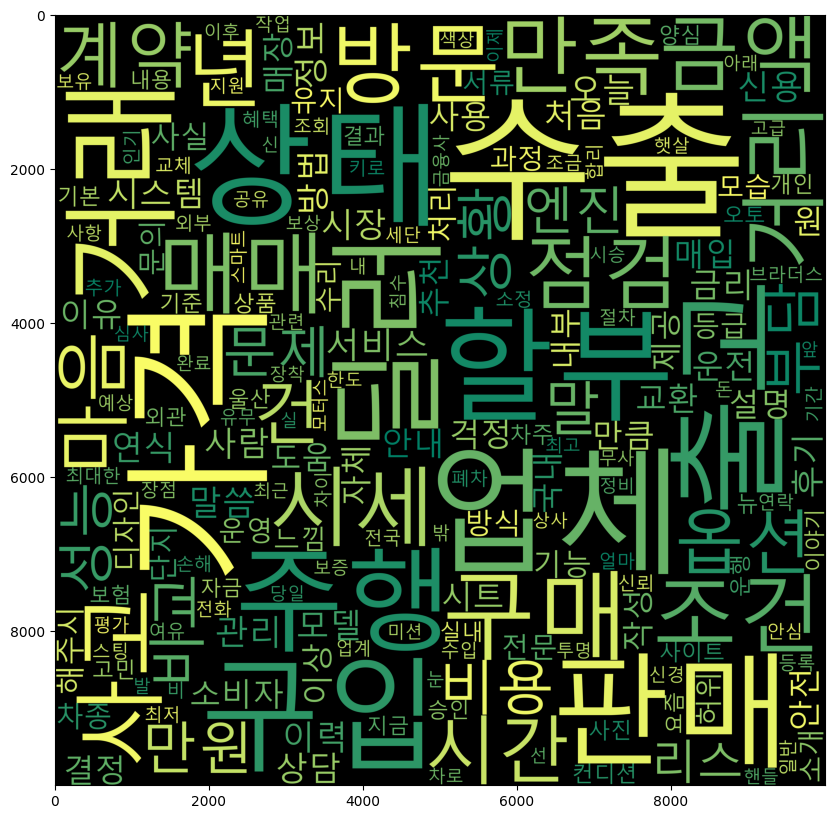

In [28]:
del_List = ['수','중고차','차량','것','차','곳','거','카','때문','분','생각','때','확인','경우','진행','이','부분','등','정도','자동차','중','이용','게','고객','을','선택','일','제가','후','필요','점','번','데','전','시','카','감','체크','대','안','이번','만','적용','마련','보니','매물','한','가지','시작','하지','편','발생','월','니다','입','견','!!','해당','감사','라고','준비','자','대부분','지','해서','뿐','포','식','원고료','아','은','덕분','안녕하세요','외','요','누','듯','쪽','위','티','다','서','중고']


for item in words:
    if item in del_List:
        words.remove(item)

count = Counter(words)
print(count)

cloud(words)

TODO _ 모델명, 브랜드 언급 글 수